In [362]:
# Classification of Chemical substances
# Created by Erwin Mazwardi
# 15-05-2023

In [1]:
import sys
print("User Current Version:-", sys.version)

User Current Version:- 3.9.0 (tags/v3.9.0:9cf6752, Oct  5 2020, 15:34:40) [MSC v.1927 64 bit (AMD64)]


In [88]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
%matplotlib inline

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [331]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### Read the dataset

In [363]:
df = pd.read_csv("chemical_substances.csv")
df

,feature1,feature2,feature3,feature4,feature5,feature6,substance
0,715,708.2755,697.9091,678.6,19.309090,711.0,1
1,734,724.7679,703.0000,688.6,14.400000,731.0,1
2,740,728.7245,701.6364,693.9,7.736364,737.0,1
3,706,701.4925,696.0000,698.7,-2.700000,702.0,1
4,731,725.8321,722.2727,719.0,3.272727,726.0,1
...,...,...,...,...,...,...,...
94,735,732.7358,730.0000,726.8,3.200000,733.0,1
95,750,745.1322,747.0000,747.5,-0.500000,748.0,2
96,754,752.1057,752.0000,753.0,-1.000000,752.0,2
97,759,756.3389,758.0000,759.0,-1.000000,758.0,2


### Checking for Outliers

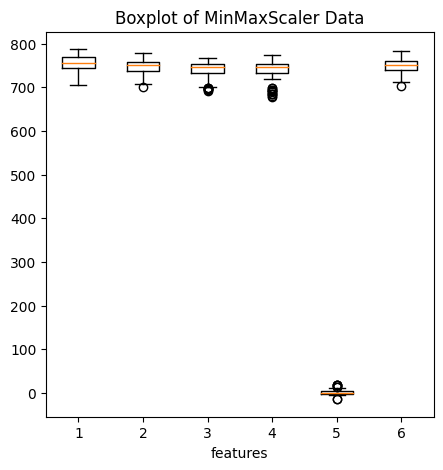

In [214]:
fig, (axes1) = plt.subplots(ncols=1, figsize=(5, 5))

axes1.set_title('Boxplot of MinMaxScaler Data')
axes1.set_xlabel('features')
axes1.boxplot(df.iloc[:, :-1])

plt.show()

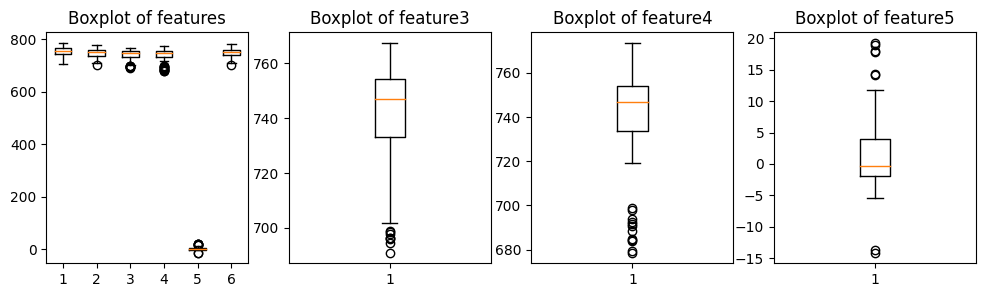

In [215]:
fig, axes = plt.subplots(ncols=4, figsize=(12, 3))

axes[0].set_title('Boxplot of features')
axes[0].boxplot(df.iloc[:, :-1])

axes[1].set_title('Boxplot of feature3')
axes[1].boxplot(df.loc[:, 'feature3'])

axes[2].set_title('Boxplot of feature4')
axes[2].boxplot(df.loc[:, 'feature4'])

axes[3].set_title('Boxplot of feature5')
axes[3].boxplot(df.loc[:, 'feature5'])

plt.show()

### Checking for range of features

In [216]:
print(f"feature1: min = {df['feature1'].min()}, max = {df['feature1'].max()}")
print(f"feature2: min = {df['feature2'].min()}, max = {df['feature2'].max()}")
print(f"feature3: min = {df['feature3'].min()}, max = {df['feature3'].max()}")
print(f"feature4: min = {df['feature4'].min()}, max = {df['feature4'].max()}")
print(f"feature5: min = {df['feature5'].min()}, max = {df['feature5'].max()}")
print(f"feature6: min = {df['feature6'].min()}, max = {df['feature6'].max()}")

feature1: min = 706, max = 787
feature2: min = 701.4925, max = 778.5151
feature3: min = 690.9091, max = 767.5455
feature4: min = 678.6, max = 773.6
feature5: min = -14.1636, max = 19.30909
feature6: min = 702.0, max = 784.0


In [217]:
df_features = df.drop(['substance'], axis=1, inplace=False)
col_names = list(df_features.columns)

#### Trying to apply the scaling transformation

<AxesSubplot:title={'center':'After MinMaxScaler'}, xlabel='features', ylabel='Density'>

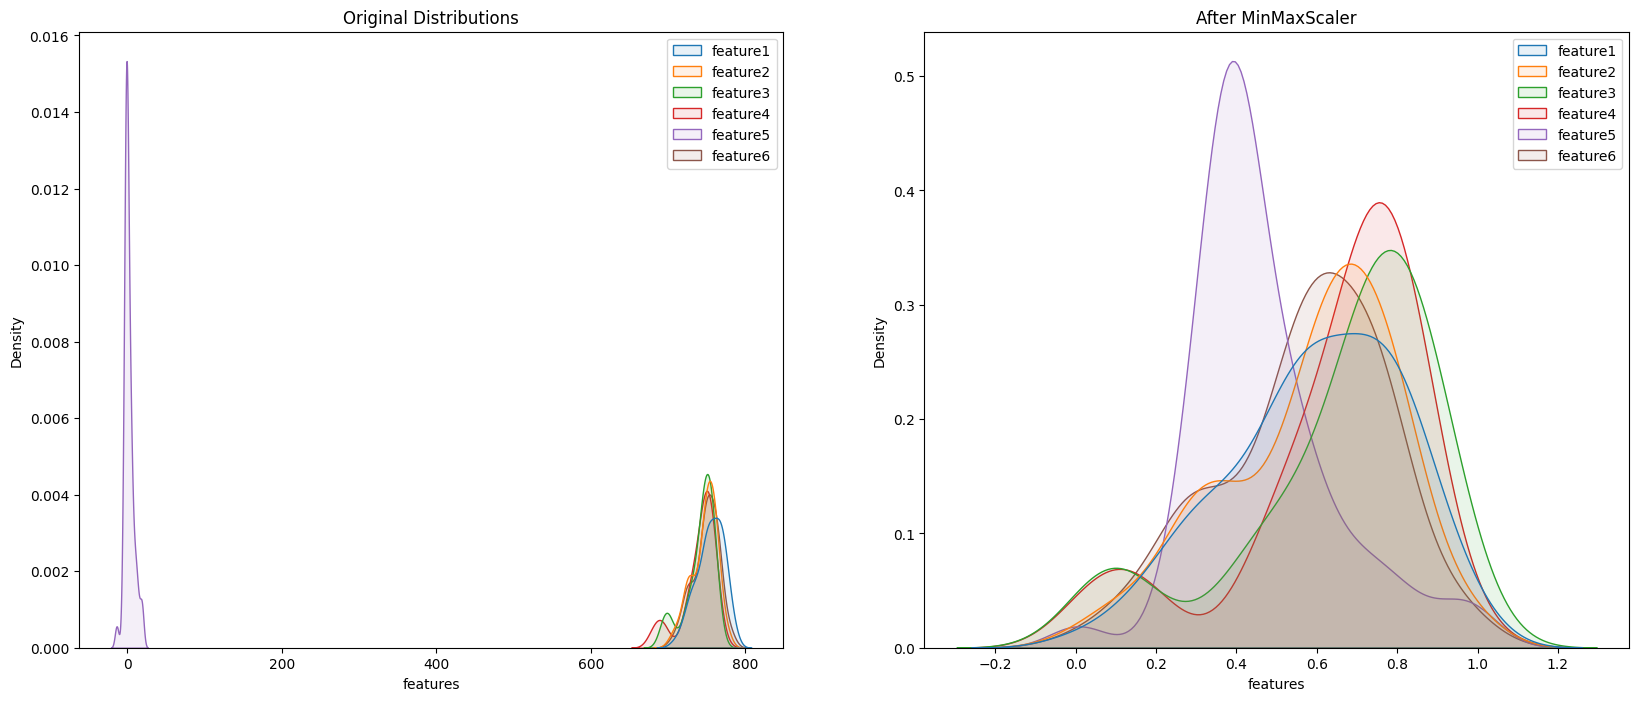

In [218]:
df_orig_comb = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'FYA': df['feature1'], '': 'feature1'}),
    pd.DataFrame.from_dict({'FYA': df['feature2'], '': 'feature2'}),
    pd.DataFrame.from_dict({'FYA': df['feature3'], '': 'feature3'}),
    pd.DataFrame.from_dict({'FYA': df['feature4'], '': 'feature4'}),
    pd.DataFrame.from_dict({'FYA': df['feature5'], '': 'feature5'}),
    pd.DataFrame.from_dict({'FYA': df['feature6'], '': 'feature6'})])

fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

axes[0].set_title('Original Distributions')
axes[0].set_xlabel('features')
sns.kdeplot(ax=axes[0], data=df_orig_comb, x='FYA', hue='', fill=True, legend=True, alpha=0.1)

mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_features)
df_mm = pd.DataFrame(df_mm, columns=col_names)

df_mm_comb = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'FYA': df_mm['feature1'], '': 'feature1'}),
    pd.DataFrame.from_dict({'FYA': df_mm['feature2'], '': 'feature2'}),
    pd.DataFrame.from_dict({'FYA': df_mm['feature3'], '': 'feature3'}),
    pd.DataFrame.from_dict({'FYA': df_mm['feature4'], '': 'feature4'}),
    pd.DataFrame.from_dict({'FYA': df_mm['feature5'], '': 'feature5'}),
    pd.DataFrame.from_dict({'FYA': df_mm['feature6'], '': 'feature6'})])

axes[1].set_title('After MinMaxScaler')
axes[1].set_xlabel('features')
sns.kdeplot(ax=axes[1], data=df_mm_comb, x='FYA', hue='', fill=True, legend=True, alpha=0.1)

#### Trying to apply the standardisation transformation

<AxesSubplot:title={'center':'After StandardScaler'}, xlabel='features', ylabel='Density'>

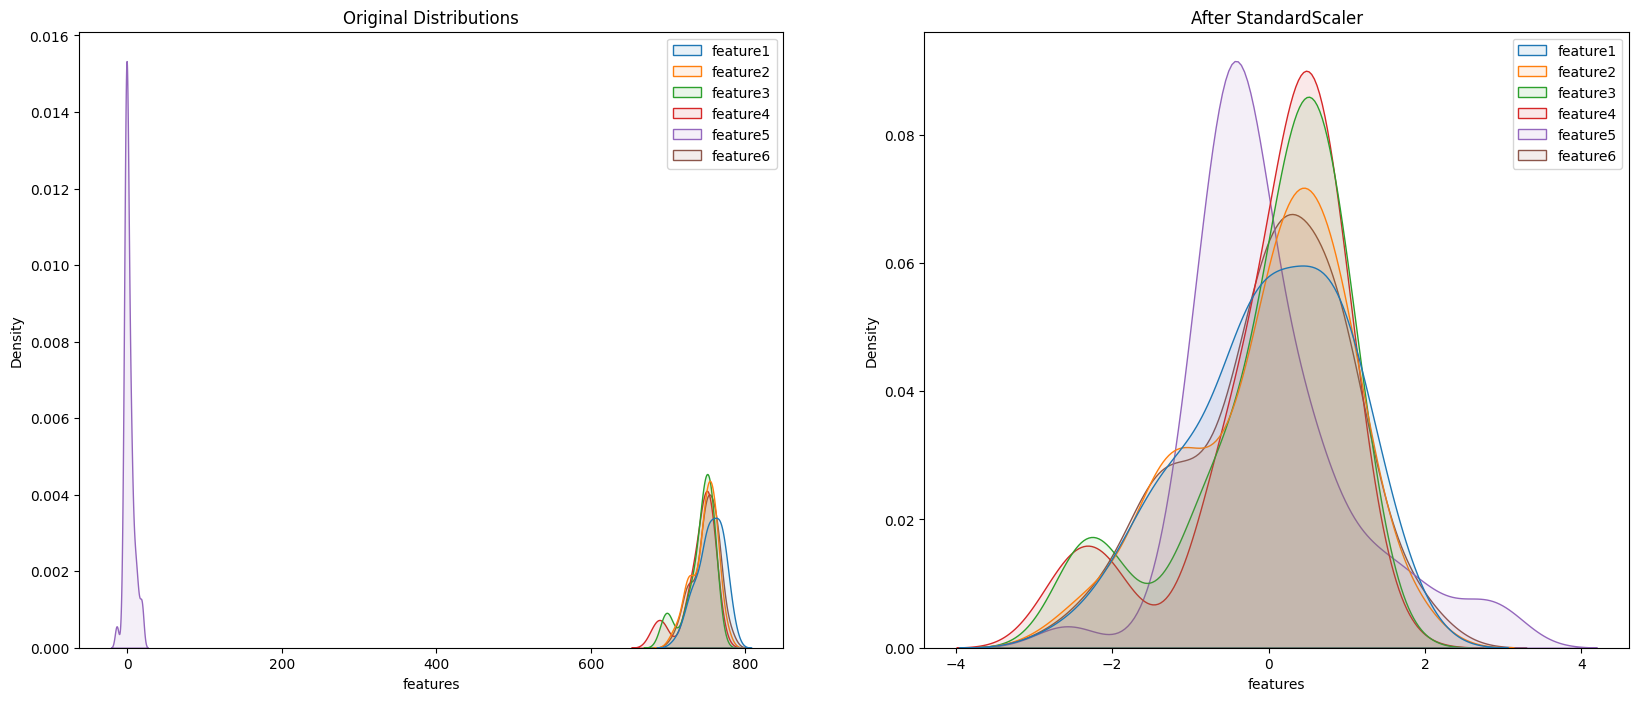

In [219]:
df_orig_comb = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'FYA': df['feature1'], '': 'feature1'}),
    pd.DataFrame.from_dict({'FYA': df['feature2'], '': 'feature2'}),
    pd.DataFrame.from_dict({'FYA': df['feature3'], '': 'feature3'}),
    pd.DataFrame.from_dict({'FYA': df['feature4'], '': 'feature4'}),
    pd.DataFrame.from_dict({'FYA': df['feature5'], '': 'feature5'}),
    pd.DataFrame.from_dict({'FYA': df['feature6'], '': 'feature6'})])

fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

axes[0].set_title('Original Distributions')
axes[0].set_xlabel('features')
sns.kdeplot(ax=axes[0], data=df_orig_comb, x='FYA', hue='', fill=True, legend=True, alpha=0.1)

s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df_features)
df_s = pd.DataFrame(df_s, columns=col_names)

df_s_comb = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'FYA': df_s['feature1'], '': 'feature1'}),
    pd.DataFrame.from_dict({'FYA': df_s['feature2'], '': 'feature2'}),
    pd.DataFrame.from_dict({'FYA': df_s['feature3'], '': 'feature3'}),
    pd.DataFrame.from_dict({'FYA': df_s['feature4'], '': 'feature4'}),
    pd.DataFrame.from_dict({'FYA': df_s['feature5'], '': 'feature5'}),
    pd.DataFrame.from_dict({'FYA': df_s['feature6'], '': 'feature6'})])

axes[1].set_title('After StandardScaler')
axes[1].set_xlabel('features')
sns.kdeplot(ax=axes[1], data=df_s_comb, x='FYA', hue='', fill=True, legend=True, alpha=0.1)

### Checking for intercorrelation

#### Using the Heatmap

In [220]:
df.corr(method='pearson')

,feature1,feature2,feature3,feature4,feature5,feature6,substance
feature1,1.000000,0.939852,0.767357,0.695720,-0.123580,0.957497,0.656420
feature2,0.939852,1.000000,0.892847,0.821944,-0.189545,0.972186,0.652073
feature3,0.767357,0.892847,1.000000,0.968012,-0.386612,0.839986,0.579250
feature4,0.695720,0.821944,0.968012,1.000000,-0.605638,0.744437,0.566778
feature5,-0.123580,-0.189545,-0.386612,-0.605638,1.000000,-0.072303,-0.246208
feature6,0.957497,0.972186,0.839986,0.744437,-0.072303,1.000000,0.652786
substance,0.656420,0.652073,0.579250,0.566778,-0.246208,0.652786,1.000000


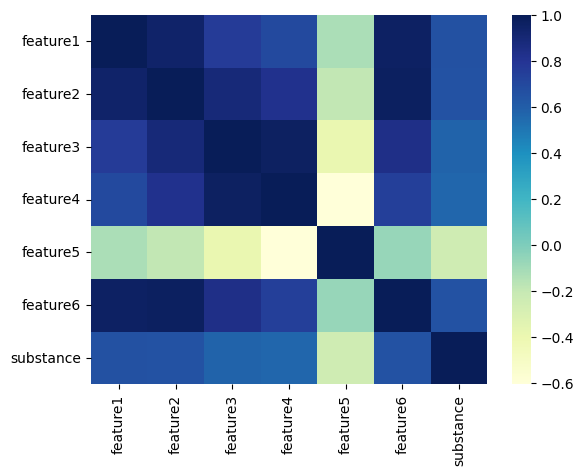

In [221]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

#### Using the Pairplot

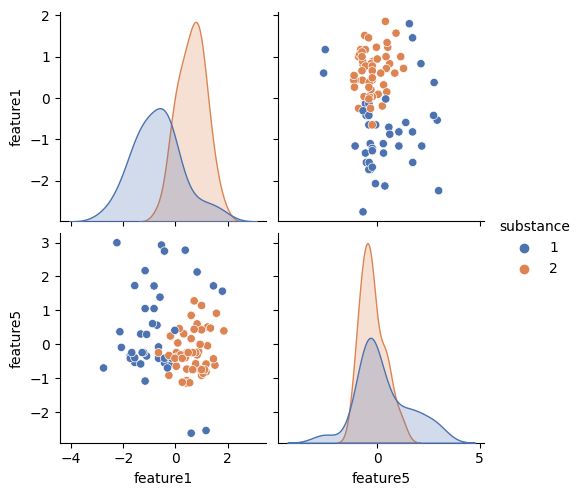

In [222]:
df_pp = df_s
df_pp['substance'] = df['substance']
sns.pairplot(df_pp, hue='substance', palette='deep', vars=['feature1', 'feature5'])

### Performing the classification

In [352]:
def perform_classification(x, y, algorithm, transform, kernel, plot, plot_type):
    # Split the dataset
    X_train_orig, X_test_orig, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
    # Select the scaling method
    if transform == 'minmax':
        mm = MinMaxScaler()
        X_train = mm.fit_transform(X_train_orig)
        X_test = mm.transform(X_test_orig)
    elif transform == 'standar':
        mm = StandardScaler()
        X_train = mm.fit_transform(X_train_orig)
        X_test = mm.transform(X_test_orig)
    elif transform == 'none':
        X_train = X_train_orig
        X_test = X_test_orig
        
    # Create a model
    if algorithm == 'svm':
        classifier = SVC(kernel=kernel, random_state=0)
        classifier.fit(X_train, np.ravel(y_train,order='C'))
    elif algorithm == 'dt':
        classifier = DecisionTreeClassifier(criterion='entropy',  max_depth=3, random_state=42)
        classifier.fit(X_train, y_train)
        
    
    # Predict the train result
    y_train_pred = classifier.predict(X_train)
    # Check for the test accuracy
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy = accuracy_score(y_train, y_train_pred)
    print('Train Confusion Matrix: \n', cm_train)
    print("Train Accuracy: {:.2f} \n".format(accuracy))
    
    # Predict the test result
    y_test_pred = classifier.predict(X_test)
    # Check for the test accuracy
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    print('Test Confusion Matrix : \n', cm_test)
    print("Test Accuracy : {:.2f} \n".format(accuracy))
    
    if plot == True:
        if plot_type == 'train':
            x_plot = X_train
            y_plot = y_train
            if algorithm == 'svm':
                if kernel == 'rbf':
                    plt.title('Kernel SVM (Train set)')
                elif kernel == 'linear':
                    plt.title('Linear SVM (Train set)')
            elif algorithm == 'dt':
                plt.title('Decision Tree (Train set)')
        elif plot_type == 'test':
            x_plot = X_test
            y_plot = y_test
            if algorithm == 'svm':
                if kernel == 'rbf':
                    plt.title('Kernel SVM (Test set)')
                elif kernel == 'linear':
                    plt.title('Linear SVM (Test set)')
            elif algorithm == 'dt':
                plt.title('Decision Tree (Test set)')
    
        X_set, y_set = sc.inverse_transform(x_plot), y_plot
        X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 2, stop = X_set[:, 0].max() + 5, step = 0.25),
                             np.arange(start = X_set[:, 1].min() - 2, stop = X_set[:, 1].max() + 1, step = 0.25))
        plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                     alpha = 0.75, cmap = ListedColormap(('red', 'green')))
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())    
        plt.xlabel('Feature1')
        plt.ylabel('Feature5')

        for i, j in enumerate(np.unique(y_set)):
            plt.scatter(X_set[np.where(y_set==j), 0], 
                        X_set[np.where(y_set==j), 1], 
                        c = ListedColormap(('yellow', 'black'))(i), 
                        label = j)

        plt.legend()
        plt.show()        

In [274]:
# Get features and target separately
X = df.loc[:,['feature1', 'feature5']].values
y = df.loc[:, ['substance']].values

#### Linear SVM

Train Confusion Matrix: 
 [[26  5]
 [ 5 33]]
Train Accuracy: 0.86 

Test Confusion Matrix : 
 [[14  2]
 [ 2 12]]
Test Accuracy : 0.87 



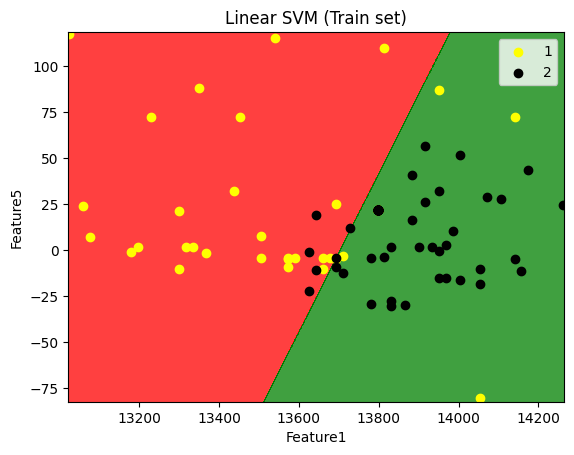

In [353]:
perform_classification(X, y, 'svm', 'none', 'linear', True, 'train')

Train Confusion Matrix: 
 [[20 11]
 [ 0 38]]
Train Accuracy: 0.84 

Test Confusion Matrix : 
 [[11  5]
 [ 1 13]]
Test Accuracy : 0.80 



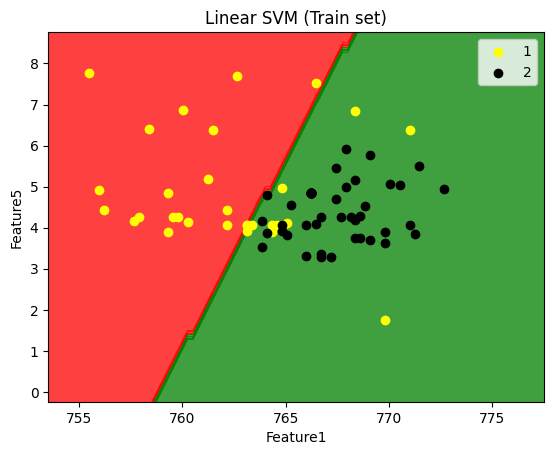

In [354]:
perform_classification(X, y, 'svm', 'minmax', 'linear', True, 'train')

Train Confusion Matrix: 
 [[23  8]
 [ 2 36]]
Train Accuracy: 0.86 

Test Confusion Matrix : 
 [[14  2]
 [ 1 13]]
Test Accuracy : 0.90 



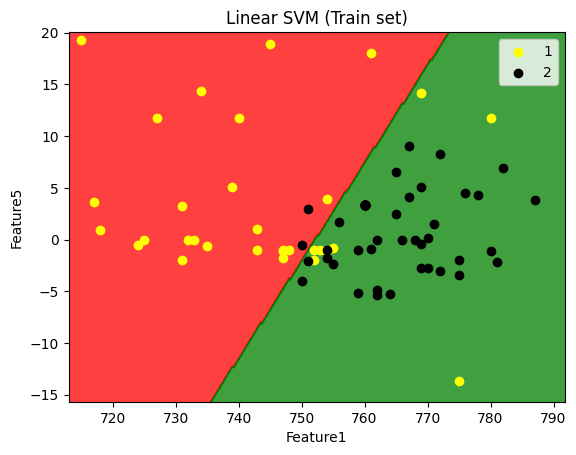

In [355]:
perform_classification(X, y, 'svm', 'standar', 'linear', True, 'train')

#### Kernel SVM

Train Confusion Matrix: 
 [[ 0 31]
 [ 0 38]]
Train Accuracy: 0.55 

Test Confusion Matrix : 
 [[ 0 16]
 [ 0 14]]
Test Accuracy : 0.47 



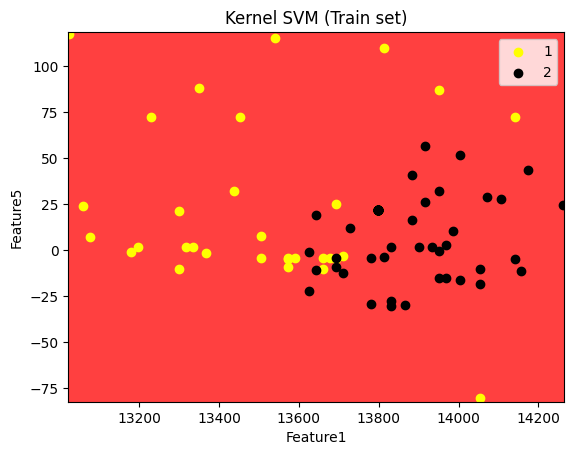

In [356]:
perform_classification(X, y, 'svm', 'none', 'rbf', True, 'train')

Train Confusion Matrix: 
 [[27  4]
 [ 4 34]]
Train Accuracy: 0.88 

Test Confusion Matrix : 
 [[15  1]
 [ 1 13]]
Test Accuracy : 0.93 



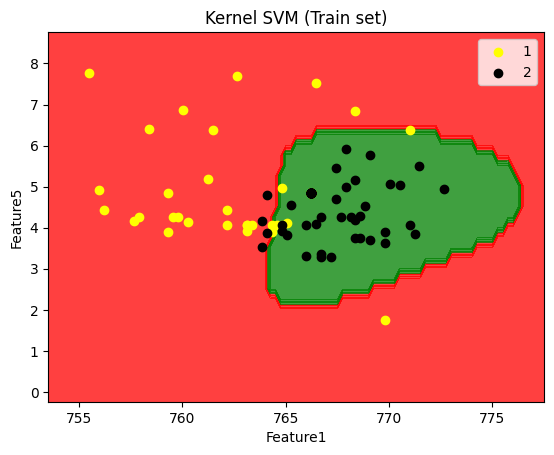

In [357]:
perform_classification(X, y, 'svm', 'minmax', 'rbf', True, 'train')

Train Confusion Matrix: 
 [[26  5]
 [ 4 34]]
Train Accuracy: 0.87 

Test Confusion Matrix : 
 [[16  0]
 [ 1 13]]
Test Accuracy : 0.97 



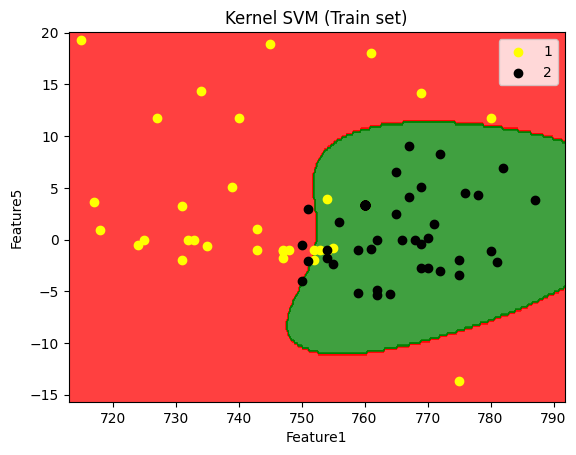

In [358]:
perform_classification(X, y, 'svm', 'standar', 'rbf', True, 'train')

#### Decision Tree

Train Confusion Matrix: 
 [[24  7]
 [ 0 38]]
Train Accuracy: 0.90 

Test Confusion Matrix : 
 [[13  3]
 [ 1 13]]
Test Accuracy : 0.87 



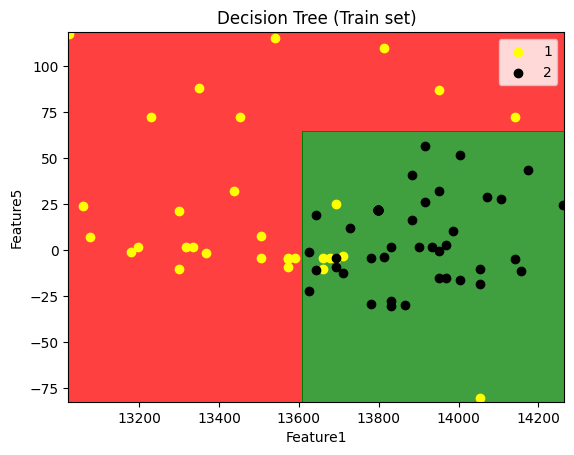

In [359]:
perform_classification(X, y, 'dt', 'none', 'linear', True, 'train')

Train Confusion Matrix: 
 [[24  7]
 [ 0 38]]
Train Accuracy: 0.90 

Test Confusion Matrix : 
 [[13  3]
 [ 1 13]]
Test Accuracy : 0.87 



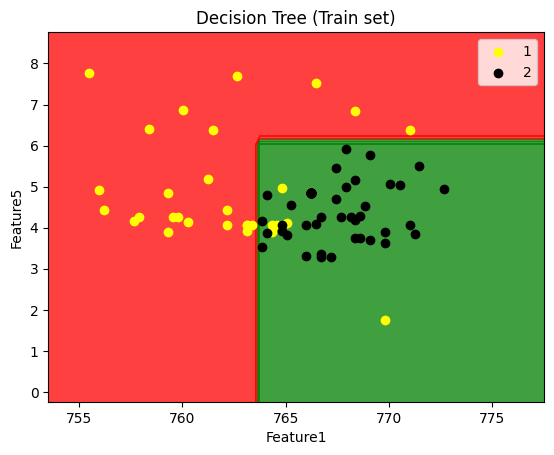

In [360]:
perform_classification(X, y, 'dt', 'minmax', 'linear', True, 'train')

Train Confusion Matrix: 
 [[24  7]
 [ 0 38]]
Train Accuracy: 0.90 

Test Confusion Matrix : 
 [[13  3]
 [ 1 13]]
Test Accuracy : 0.87 



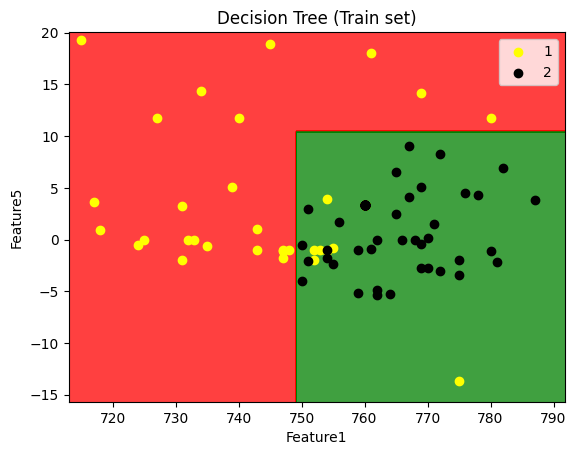

In [361]:
perform_classification(X, y, 'dt', 'standar', 'linear', True, 'train')